### Note for question1
- Please follow the template to complete q1
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn import linear_model

## 1a.) Load data and plot
### TODO
- load data
- plot the points of different labels with different color

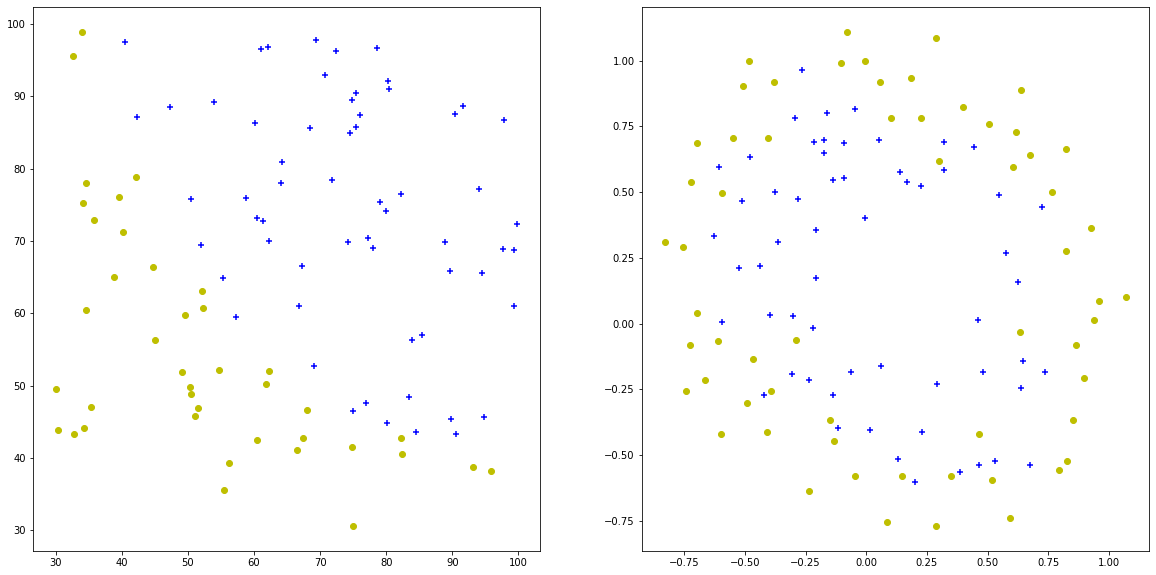

In [2]:
# Load dataset
x1_1, x2_1, y_1 = np.loadtxt("ex2data1.txt", delimiter=',', unpack=True)
x1_2, x2_2, y_2 = np.loadtxt("ex2data2.txt", delimiter=',', unpack=True)

# Plot points
class_color = ['y', 'b']
class_marker = ['o', '+']

fig, _ = plt.subplots(nrows=1, ncols=2, figsize =(20,10))

plt.subplot(121)
plt.scatter(x1_1[y_1 == 0], x2_1[y_1 == 0], marker='o', color='y')
plt.scatter(x1_1[y_1 == 1], x2_1[y_1 == 1], marker='+', color='b')

plt.subplot(122)
plt.scatter(x1_2[y_2 == 0], x2_2[y_2 == 0], marker='o', color='y')
plt.scatter(x1_2[y_2 == 1], x2_2[y_2 == 1], marker='+', color='b')

plt.show()

## 1b.) sigmoid function
### TODO
- name the sigmoid function **sigmoid()**

In [3]:
# Define sigmoid function

""" For code to work, input MUST be in the following shapes:
    X.shape = (# of samples, # of features), 
    w.shape = (# of features, 1) or (1, # of features) """

def sigmoid(X, w):
    if w.shape[0] == 1:
        w = np.transpose(w)
    
    if (X.shape[1] + 1) < w.shape[0]:
        raise ValueError("Too many weights for features.")
    elif (X.shape[1] + 1) > w.shape[0]:
        raise ValueError("Not enough weights for features.")
    else:
        """ Append bias term for first weight """
        bias = np.ones((X.shape[0], 1))
        X = np.hstack((bias, X))

    """ Sigmoid function, returns N values for N samples """
    sig = np.divide(1, 1 + np.exp(-X @ w))

    return sig


## 1c.) loss function, gradient function
### TODO

- Define loss function and name it **loss()**
- Define Gradient Function and name it **gradient()**

In [4]:
# Define loss function

""" For codes to work, input MUST be in the following shapes:
    X.shape = (# of samples, # of features),
    Y.shape = (# of samples, 1),
    w.shape = (# of features, 1) or (1, # of features) """

def loss(X, Y, w):
    J = 1/len(Y)*np.sum(np.nan_to_num(-Y * np.log(sigmoid(X, w)) - (1-Y) * np.log(1 - sigmoid(X, w))))

    return J

# Define gradient function
def gradient(X, Y, w):
    G = np.empty_like(w)
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((bias, X))
    for i in range(len(G)):
        G[i] = 1/len(Y)*np.sum((sigmoid(X[:,1:], w) - Y) * X[:, i][:, np.newaxis])

    return G


## 1d.) prediction function, gradient descent and plot meshgrids

### TODO

- Define a prediction function and name it **predict()**
- Using all above functions implement gradient descent with appropriate initialization, learning rates & # of initialization
- Use contourf/meshgrids or any other command to visualize the boundary conditions

In [5]:
# Define prediction function
def predict(X, Y, w0, learn_rate):
    J = loss(X, Y, w0)

    """ Batch Gradient Descent """
    i = 0
    while J > 0.25:
        w1 = w0 - learn_rate * gradient(X, Y, w0)
        J = loss(X, Y, w1)
        w0 = w1
        i += 1
    
    pred = sigmoid(X, w0)
    return pred, i, w0


In [6]:
# Call prediction function and Plot meshgrid to visualize 
X = np.vstack((x1_1, x2_1))
X = np.transpose(X)
Y = y_1[:, np.newaxis]
w0 = np.random.random_sample((3, 1))/5
learn_rate = 0.008

predictions, i, w = predict(X, Y, w0, learn_rate)
print("Iterations used in training = {}".format(i))

Iterations used in training = 52843


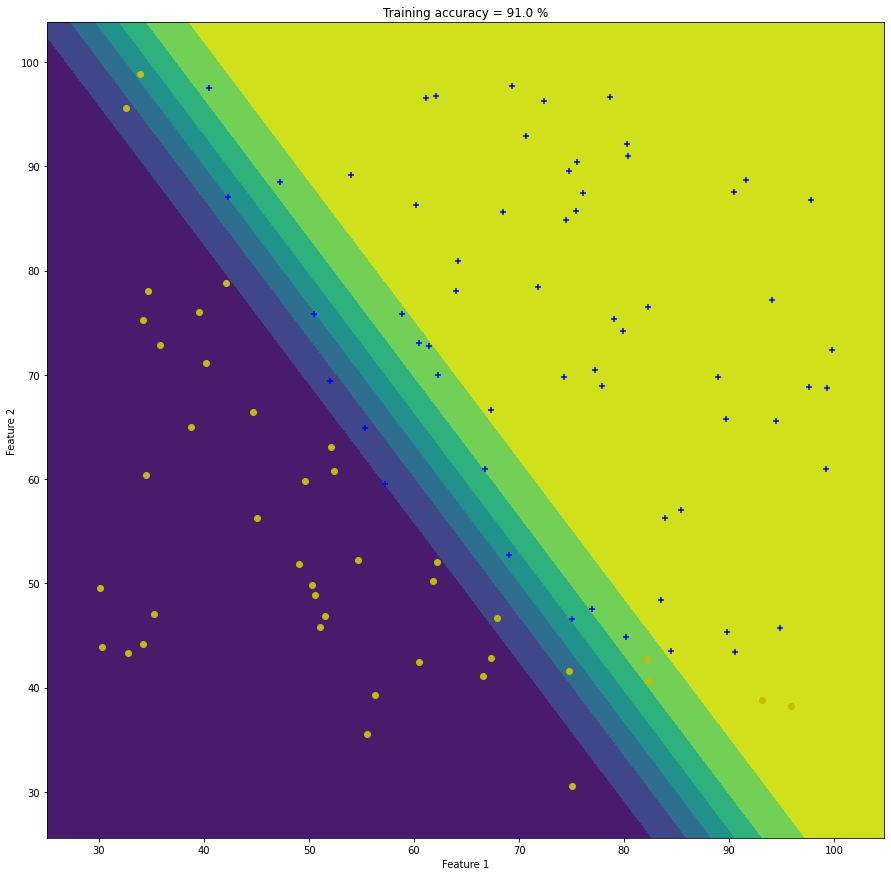

In [7]:
train_acc = np.count_nonzero(np.around(predictions) == Y)/len(Y) * 100

plt.figure(figsize =(15,15))
xx, yy = np.meshgrid(np.arange(x1_1.min()-5, x1_1.max()+5, 0.1), np.arange(x2_1.min()-5, x2_1.max()+5, 0.1))
X = np.c_[xx.ravel(), yy.ravel()]
h = sigmoid(X, w)
h = h.reshape(xx.shape)

plt.contourf(xx, yy, h)
plt.scatter(x1_1[y_1 == 0], x2_1[y_1 == 0], marker='o', color='y')
plt.scatter(x1_1[y_1 == 1], x2_1[y_1 == 1], marker='+', color='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training accuracy = {} %".format(train_acc))
plt.show()

## 2a.) Feature mapping, regularized Cost function, gradient function and gradient descent
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up
- Create a regularized loss function & gradient function and name it **loss_reg()** and **gradient_reg()**
- Using both these functions implement gradient descent with appropriate initialization, learning rates & # of initialization
- tweak the hyper-parameter $\lambda$ to be $[0.0001, 1, 100]$
- Use contourf/meshgrids or any other command to visualize the boundary conditions


In [8]:
# Transform points to 28D space
def map_feature(x1, x2):
    # Alternate method
    """ Loop to determine how many features are in the transformed map """
    # id = 0
    # for i in range(1, p_max + 2):
    #     id += i
    # trans_feat = np.empty((len(f1), id))

    # """ Main loop to fill in the elements """
    # id = 0
    # for i in range(0, p_max + 1):
    #     j = 0
    #     while j <= i:
    #         trans_feat[:, id][:, np.newaxis] = np.power(f1, j) * np.power(f2, i-j)
    #         id += 1
    #         j += 1

    # return trans_feat

    """ Hard-coding to save time complexity """
    trans_feat = np.empty((len(x1), 28))

    trans_feat[:,0][:, np.newaxis] = 1
    trans_feat[:,1][:, np.newaxis] = x1
    trans_feat[:,2][:, np.newaxis] = x2
    trans_feat[:,3][:, np.newaxis] = x1**2
    trans_feat[:,4][:, np.newaxis] = x1*x2
    trans_feat[:,5][:, np.newaxis] = x2**2
    trans_feat[:,6][:, np.newaxis] = x1**3
    trans_feat[:,7][:, np.newaxis] = x1**2 * x2
    trans_feat[:,8][:, np.newaxis] = x1 * x2**2
    trans_feat[:,9][:, np.newaxis] = x2**3
    trans_feat[:,10][:, np.newaxis] = x1**4
    trans_feat[:,11][:, np.newaxis] = x1**3 * x2
    trans_feat[:,12][:, np.newaxis] = x1**2 * x2**2
    trans_feat[:,13][:, np.newaxis] = x1 * x2**3
    trans_feat[:,14][:, np.newaxis] = x2**4
    trans_feat[:,15][:, np.newaxis] = x1**5
    trans_feat[:,16][:, np.newaxis] = x1**4 * x2
    trans_feat[:,17][:, np.newaxis] = x1**3 * x2**2
    trans_feat[:,18][:, np.newaxis] = x1**2 * x2**3
    trans_feat[:,19][:, np.newaxis] = x1 * x2**4
    trans_feat[:,20][:, np.newaxis] = x2**5
    trans_feat[:,21][:, np.newaxis] = x1**6
    trans_feat[:,22][:, np.newaxis] = x1**5 * x2
    trans_feat[:,23][:, np.newaxis] = x1**4 * x2**2
    trans_feat[:,24][:, np.newaxis] = x1**3 * x2**3
    trans_feat[:,25][:, np.newaxis] = x1**2 * x2**4
    trans_feat[:,26][:, np.newaxis] = x1 * x2**5
    trans_feat[:,27][:, np.newaxis] = x2**6

    return trans_feat

# Define cost function
def loss_reg(X, Y, w, lam):
    J = 1/len(Y)*np.sum(np.nan_to_num(-Y * np.log(sigmoid(X, w)) - (1-Y) * np.log(1 - sigmoid(X, w)))) + lam/(2*len(Y))*np.sum(np.power(w[1:], 2))

    return J

# Define gradient function
def gradient_reg(X, Y, w, lam):
    G = np.empty_like(w)
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((bias, X))
    G[0] = 1/len(Y)*np.sum((sigmoid(X[:,1:], w) - Y) * X[:, 0][:, np.newaxis])
    for i in range(1, len(G)):
        G[i] = 1/len(Y)*np.sum((sigmoid(X[:,1:], w) - Y) * X[:, i][:, np.newaxis]) + lam/len(Y)*w[i]

    return G

# Define prediction function which implements regularized logistic regression
def predict_reg(X, Y, w0, learn_rate, lam):
    J = loss_reg(X, Y, w0, lam)

    """ Batch Gradient Descent """
    i = 0
    while J > 0.25:
        w1 = w0 - learn_rate * gradient_reg(X, Y, w0, lam)
        J = loss_reg(X, Y, w1, lam)
        w0 = w1
        i += 1
        if i > 1e5:
            break
    
    pred = sigmoid(X, w0)
    return pred, i, w0


In [9]:
# Call prediction function and Plot meshgrid to visualize 
X = map_feature(x1_2[:,np.newaxis], x2_2[:,np.newaxis])
X = X[:,1:] # This is some peculiarity of how I set up my sigmoid function, the column of 1s will be appended back.
Y = y_2[:, np.newaxis]
w0 = np.zeros((28, 1))
learn_rate = 0.5

## $\lambda$ = 1

In [10]:
# lambda = 1
lam0 = 1
predictions0, i, w = predict_reg(X, Y, w0, learn_rate, lam0)
print("Iterations used in training for lambda = {} : {}".format(lam0, i))

Iterations used in training for lambda = 1 : 100001


Text(0.5, 1.0, 'Training accuracy = 83.05084745762711 %, $\\lambda$ = 1')

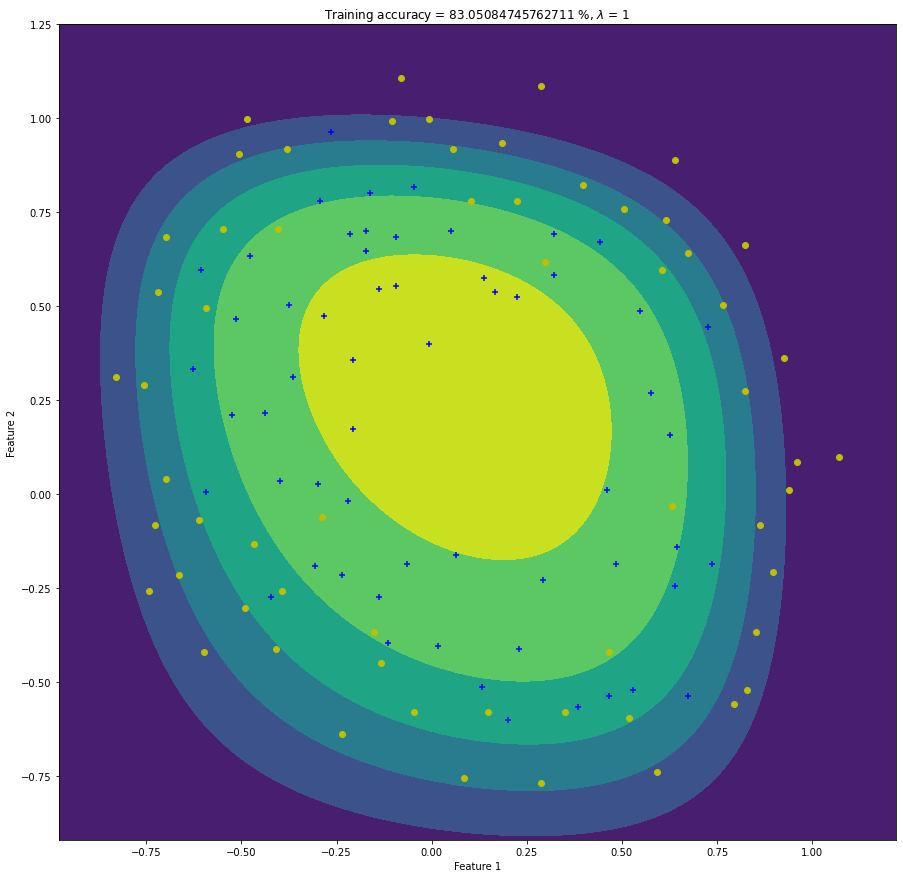

In [11]:
train_acc0 = np.count_nonzero(np.around(predictions0) == Y)/len(Y) * 100
plt.figure(figsize =(15,15))
xx, yy = np.meshgrid(np.arange(x1_2.min()-0.15, x1_2.max()+0.15, 0.01), np.arange(x2_2.min()-0.15, x2_2.max()+0.15, 0.01))
test_array = np.c_[xx.ravel(), yy.ravel()]
X_trans = map_feature(test_array[:,0][:,np.newaxis], test_array[:,1][:,np.newaxis])
h = sigmoid(X_trans[:,1:], w)
h = h.reshape(xx.shape)
plt.contourf(xx, yy, h)
plt.scatter(x1_2[y_2 == 0], x2_2[y_2 == 0], marker='o', color='y')
plt.scatter(x1_2[y_2 == 1], x2_2[y_2 == 1], marker='+', color='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training accuracy = {} %, $\lambda$ = {}".format(train_acc0, lam0))

In [12]:
print("The weight used in the above model is a {} matrix, and is listed as follows:\n".format(w.shape))
print(w)

The weight used in the above model is a (28, 1) matrix, and is listed as follows:

[[ 1.27273951]
 [ 0.6252718 ]
 [ 1.18108869]
 [-2.01996086]
 [-0.91742375]
 [-1.43166444]
 [ 0.12400635]
 [-0.36553437]
 [-0.35723962]
 [-0.17513048]
 [-1.45815646]
 [-0.05098906]
 [-0.61555504]
 [-0.27470631]
 [-1.19281652]
 [-0.24218823]
 [-0.20600609]
 [-0.04473075]
 [-0.2777845 ]
 [-0.2953781 ]
 [-0.45635749]
 [-1.04320249]
 [ 0.02777171]
 [-0.29243131]
 [ 0.01556681]
 [-0.32737959]
 [-0.14388693]
 [-0.92465257]]


## 2b.)
## $\lambda$ = 0.0001

In [13]:
# lambda = 0.0001
lam1 = 0.0001
predictions1, i, w1 = predict_reg(X, Y, w0, learn_rate, lam1)
print("Iterations used in training for lambda = {} : {}".format(lam1, i))

Iterations used in training for lambda = 0.0001 : 100001


## $\lambda$ = 100

In [14]:
# lambda = 100
lam2 = 100
predictions2, i, w2 = predict_reg(X, Y, w0, learn_rate, lam2)
print("Iterations used in training for lambda = {} : {}".format(lam2, i))

Iterations used in training for lambda = 100 : 100001


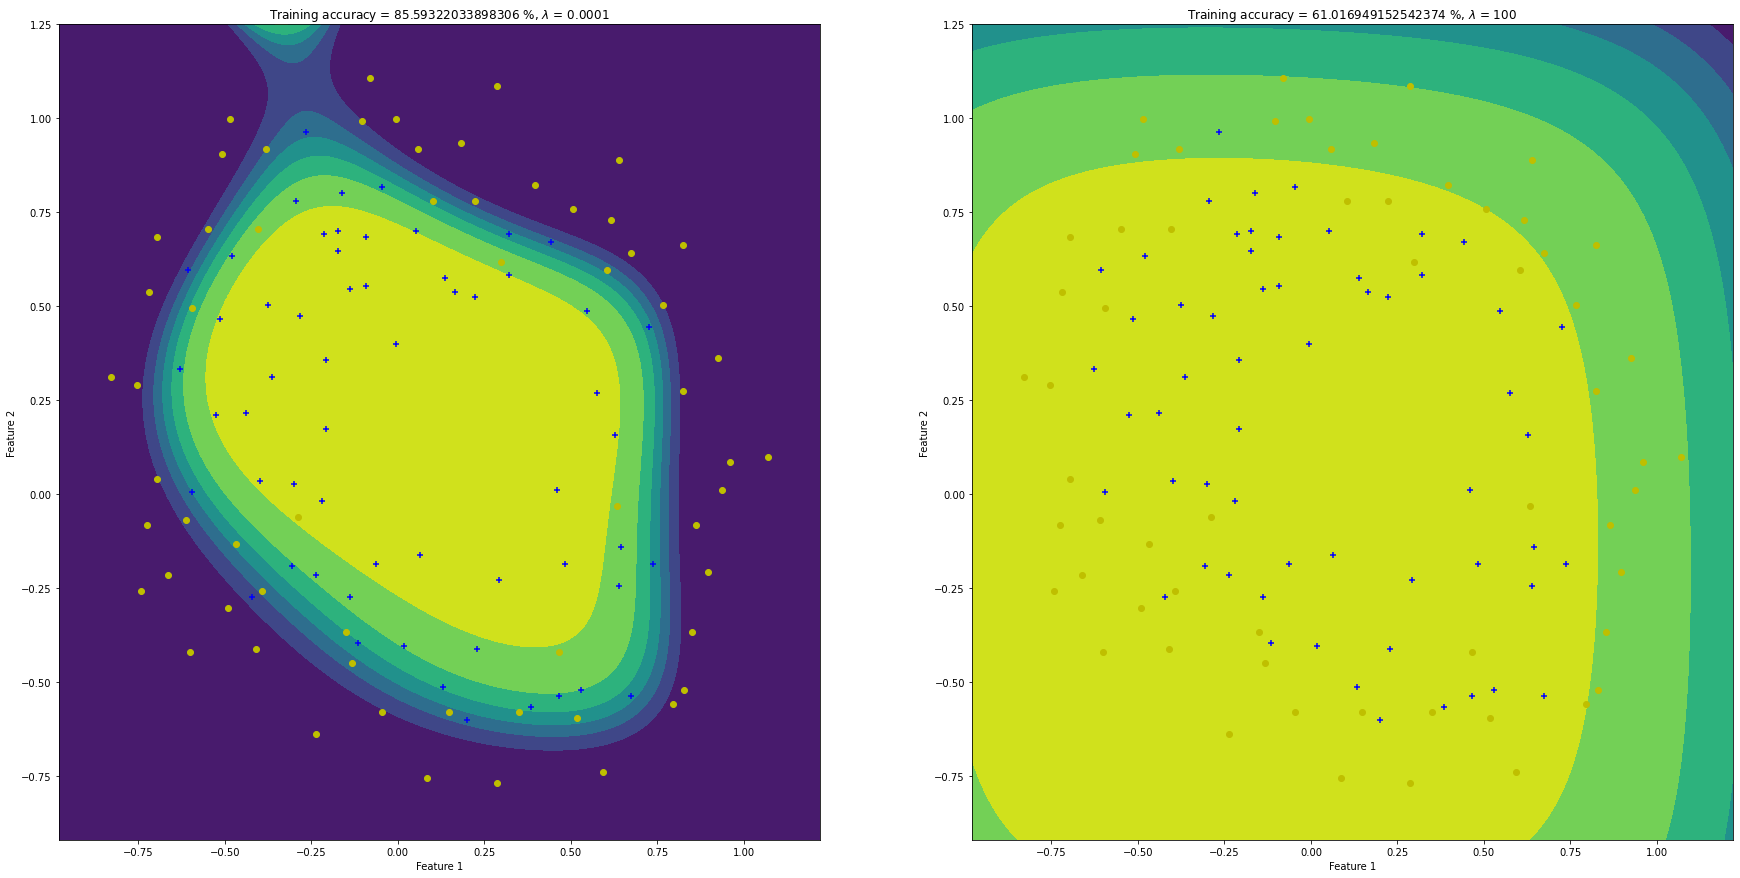

In [15]:
train_acc1 = np.count_nonzero(np.around(predictions1) == Y)/len(Y) * 100
train_acc2 = np.count_nonzero(np.around(predictions2) == Y)/len(Y) * 100

fig, _ = plt.subplots(nrows=1, ncols=2, figsize =(30,15))

plt.subplot(121)
xx, yy = np.meshgrid(np.arange(x1_2.min()-0.15, x1_2.max()+0.15, 0.01), np.arange(x2_2.min()-0.15, x2_2.max()+0.15, 0.01))
test_array = np.c_[xx.ravel(), yy.ravel()]
X_trans = map_feature(test_array[:,0][:,np.newaxis], test_array[:,1][:,np.newaxis])
h = sigmoid(X_trans[:,1:], w1)
h = h.reshape(xx.shape)
plt.contourf(xx, yy, h)
plt.scatter(x1_2[y_2 == 0], x2_2[y_2 == 0], marker='o', color='y')
plt.scatter(x1_2[y_2 == 1], x2_2[y_2 == 1], marker='+', color='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training accuracy = {} %, $\lambda$ = {}".format(train_acc1, lam1))

plt.subplot(122)
xx, yy = np.meshgrid(np.arange(x1_2.min()-0.15, x1_2.max()+0.15, 0.01), np.arange(x2_2.min()-0.15, x2_2.max()+0.15, 0.01))
test_array = np.c_[xx.ravel(), yy.ravel()]
X_trans = map_feature(test_array[:,0][:,np.newaxis], test_array[:,1][:,np.newaxis])
h = sigmoid(X_trans[:,1:], w2)
h = h.reshape(xx.shape)
plt.contourf(xx, yy, h)
plt.scatter(x1_2[y_2 == 0], x2_2[y_2 == 0], marker='o', color='y')
plt.scatter(x1_2[y_2 == 1], x2_2[y_2 == 1], marker='+', color='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training accuracy = {} %, $\lambda$ = {}".format(train_acc2, lam2))
plt.show()

## Using logistic regression function from sklearn
## $\lambda$ = 1

Text(0.5, 1.0, 'Training accuracy using sklearn = 83.05084745762711 %, $\\lambda$ = 1')

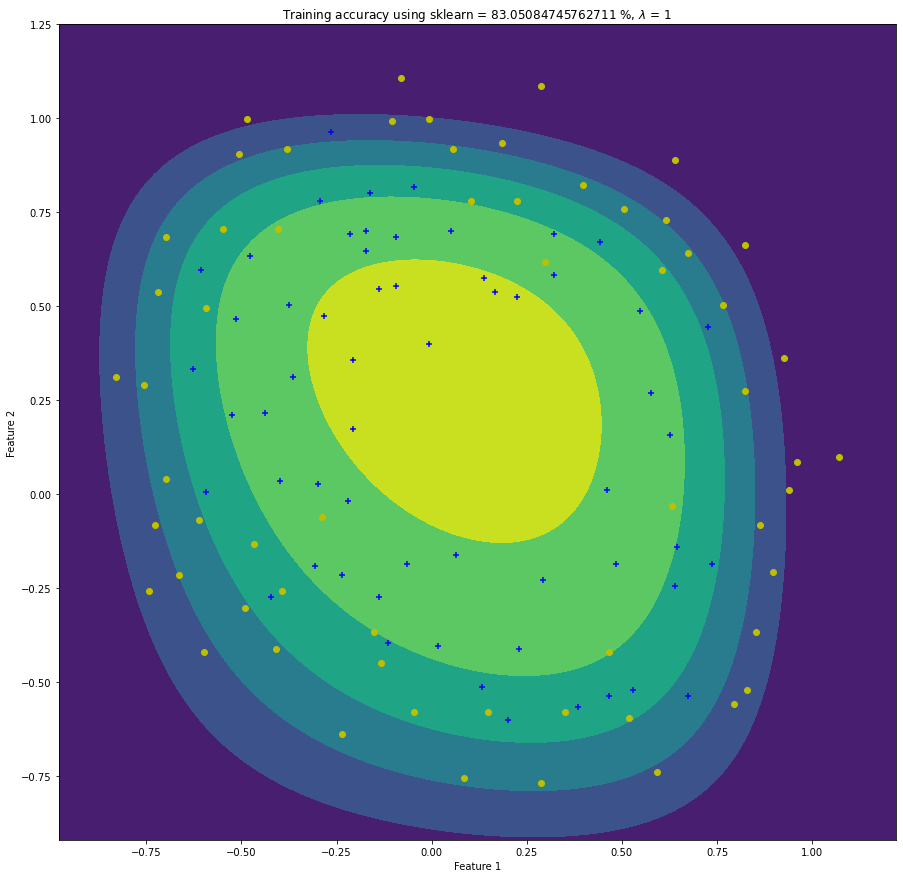

In [16]:
X = map_feature(x1_2[:,np.newaxis], x2_2[:,np.newaxis])
Y = y_2[:, np.newaxis]
clf = linear_model.LogisticRegression(penalty='l2', solver='liblinear', tol=1e-6, max_iter=int(1e6)).fit(X, Y)
xx, yy = np.meshgrid(np.arange(x1_2.min()-0.15, x1_2.max()+0.15, 0.01), np.arange(x2_2.min()-0.15, x2_2.max()+0.15, 0.01))
test_array = np.c_[xx.ravel(), yy.ravel()]
test_array = map_feature(test_array[:,0][:,np.newaxis], test_array[:,1][:,np.newaxis])
Z = clf.predict_proba(test_array)
predictions_sk = Z[:, 1]
predictions_sk = predictions_sk.reshape(xx.shape)

plt.figure(figsize =(15,15))
plt.contourf(xx, yy, predictions_sk)
# plt.contourf(xx, yy, predictions_sk, levels=[0, 0.5], colors=['g', 'y', 'g', 'b', 'm'])
plt.scatter(x1_2[y_2 == 0], x2_2[y_2 == 0], marker='o', color='y')
plt.scatter(x1_2[y_2 == 1], x2_2[y_2 == 1], marker='+', color='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training accuracy using sklearn = {} %, $\lambda$ = 1".format(clf.score(X,Y)*100))

## $\lambda$ = 0.0001

Text(0.5, 1.0, 'Training accuracy using sklearn = 86.4406779661017 %, $\\lambda$ = 0.0001')

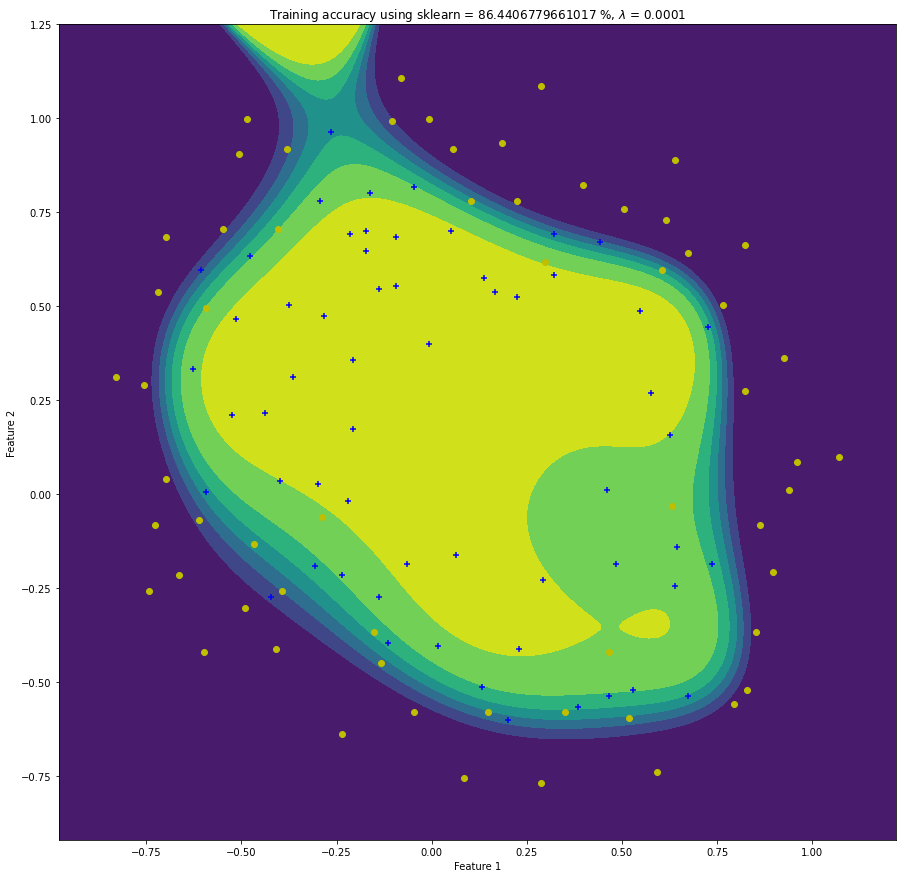

In [18]:
clf = linear_model.LogisticRegression(penalty='l2', solver='liblinear', tol=1e-6, C=1/0.0001, max_iter=int(1e6)).fit(X, Y)
xx, yy = np.meshgrid(np.arange(x1_2.min()-0.15, x1_2.max()+0.15, 0.01), np.arange(x2_2.min()-0.15, x2_2.max()+0.15, 0.01))
test_array = np.c_[xx.ravel(), yy.ravel()]
test_array = map_feature(test_array[:,0][:,np.newaxis], test_array[:,1][:,np.newaxis])
Z = clf.predict_proba(test_array)
predictions_sk = Z[:, 1]
predictions_sk = predictions_sk.reshape(xx.shape)

plt.figure(figsize =(15,15))
plt.contourf(xx, yy, predictions_sk)
# plt.contourf(xx, yy, predictions_sk, levels=[0, 0.5], colors=['g', 'y', 'g', 'b', 'm'])
plt.scatter(x1_2[y_2 == 0], x2_2[y_2 == 0], marker='o', color='y')
plt.scatter(x1_2[y_2 == 1], x2_2[y_2 == 1], marker='+', color='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training accuracy using sklearn = {} %, $\lambda$ = 0.0001".format(clf.score(X,Y)*100))

## $\lambda$ = 100

Text(0.5, 1.0, 'Training accuracy using sklearn = 61.016949152542374 %, $\\lambda$ = 100')

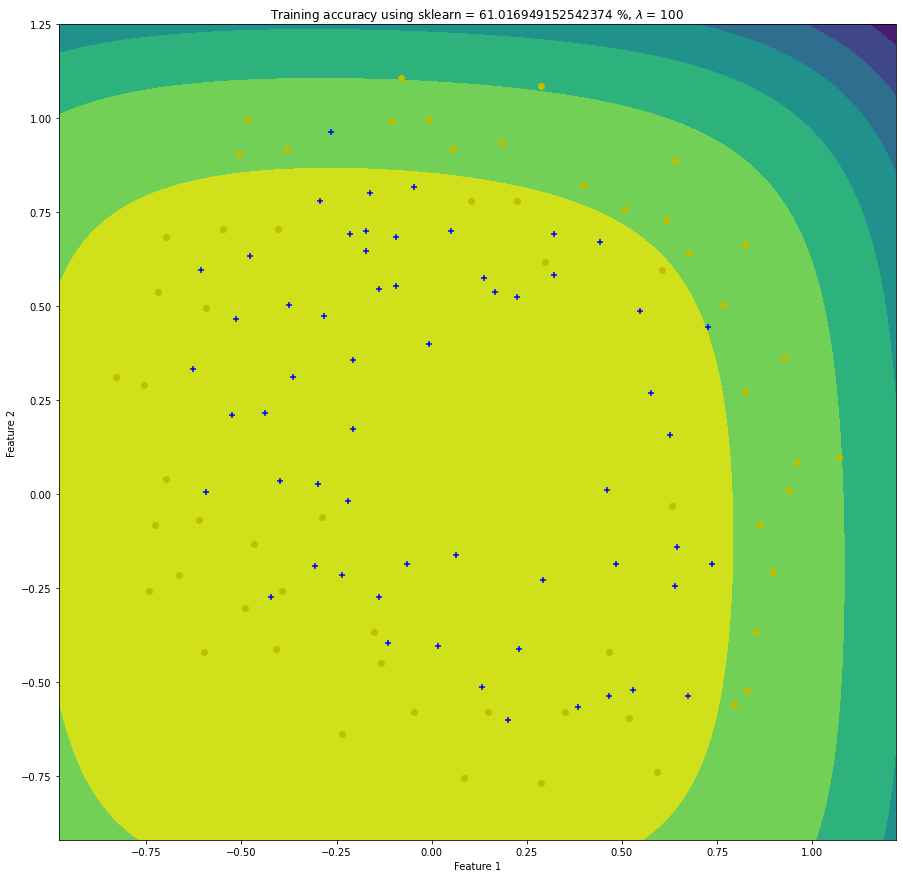

In [19]:
clf = linear_model.LogisticRegression(penalty='l2', solver='liblinear', tol=1e-6, C=1/100, max_iter=int(1e6)).fit(X, Y)
xx, yy = np.meshgrid(np.arange(x1_2.min()-0.15, x1_2.max()+0.15, 0.01), np.arange(x2_2.min()-0.15, x2_2.max()+0.15, 0.01))
test_array = np.c_[xx.ravel(), yy.ravel()]
test_array = map_feature(test_array[:,0][:,np.newaxis], test_array[:,1][:,np.newaxis])
Z = clf.predict_proba(test_array)
predictions_sk = Z[:, 1]
predictions_sk = predictions_sk.reshape(xx.shape)

plt.figure(figsize =(15,15))
plt.contourf(xx, yy, predictions_sk)
# plt.contourf(xx, yy, predictions_sk, levels=[0, 0.5], colors=['g', 'y', 'g', 'b', 'm'])
plt.scatter(x1_2[y_2 == 0], x2_2[y_2 == 0], marker='o', color='y')
plt.scatter(x1_2[y_2 == 1], x2_2[y_2 == 1], marker='+', color='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training accuracy using sklearn = {} %, $\lambda$ = 100".format(clf.score(X,Y)*100))